In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
years = list(range(2004, 2020))
election_years = [2004, 2006, 2008, 2011, 2015, 2019]

## Data Imports

In [ ]:
lda_lst = []
bertopic_lst = []

for year in years:
    lda_lst += [pd.read_csv(f'/content/drive/MyDrive/Uni stuff/Classes/Fourth Year MI/Thesis/LDA Processed Data/lda_{year}_no_numbers.csv',index_col=0)]

for year in years:
    bertopic_lst += [pd.read_csv(f'/content/drive/MyDrive/Uni stuff/Classes/Fourth Year MI/Thesis/BERTopic Processed Data/bert_{year}.csv',index_col=0)]

In [ ]:
overall_lda = []
for year in years:
    overall_lda += [pd.read_csv(f'/content/drive/MyDrive/Uni stuff/Classes/Fourth Year MI/Thesis/LDA Processed Data/lda_{year}_overall_jsd.csv',index_col=0)]

overall_bertopic = []
for year in years:
    overall_bertopic += [pd.read_csv(f'/content/drive/MyDrive/Uni stuff/Classes/Fourth Year MI/Thesis/BERTopic Processed Data/bertopic_{year}_overall_jsd.csv',index_col=0)]

## Plots

### Pariwise Jensen-Shannon Divergence

#### LDA Results:

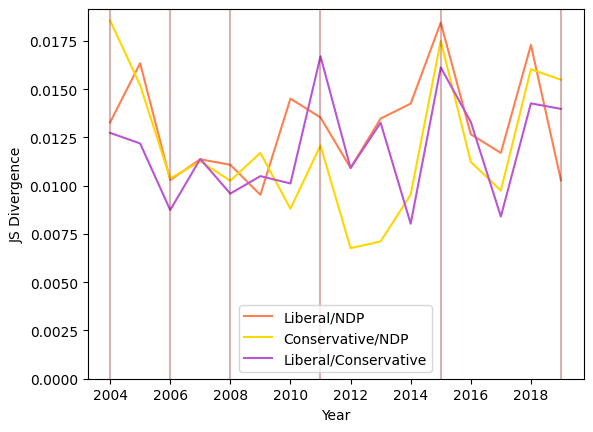

In [ ]:
lib_con = [y["Liberal"]["Conservative"] for y in lda_lst]
lib_ndp = [y["Liberal"]["New Democratic Party"] for y in lda_lst]
con_ndp = [y["Conservative"]["New Democratic Party"] for y in lda_lst]

plt.plot(years, lib_ndp,  label="Liberal/NDP", color='coral')
plt.plot(years, con_ndp, label="Conservative/NDP", color='gold')
plt.plot(years, lib_con, label="Liberal/Conservative", color='mediumorchid')


for year in election_years:
    plt.axvline(year, color='maroon', alpha=0.3)
plt.legend()
plt.gca().set_ylim(bottom=0)

plt.xlabel("Year")
plt.ylabel("JS Divergence")
plt.show()

#### BERTopic Results:

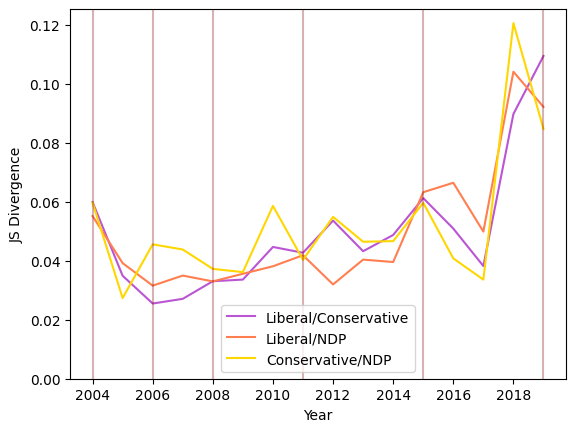

In [ ]:
lib_con = [y["Liberal"]["Conservative"] for y in bertopic_lst]
lib_ndp = [y["Liberal"]["New Democratic Party"] for y in bertopic_lst]
con_ndp = [y["Conservative"]["New Democratic Party"] for y in bertopic_lst]

plt.plot(years, lib_con, label="Liberal/Conservative", color='mediumorchid')
plt.plot(years, lib_ndp,  label="Liberal/NDP", color='coral')
plt.plot(years, con_ndp, label="Conservative/NDP", color='gold')

for year in election_years:
    plt.axvline(year, color='maroon', alpha=0.3)
plt.legend()
plt.gca().set_ylim(bottom=0)
plt.xlabel("Year")
plt.ylabel("JS Divergence")

plt.show()

### Generalized Jensen-Shannon Divergence

#### LDA Results:

Text(0, 0.5, 'Generalized JS Divergence')

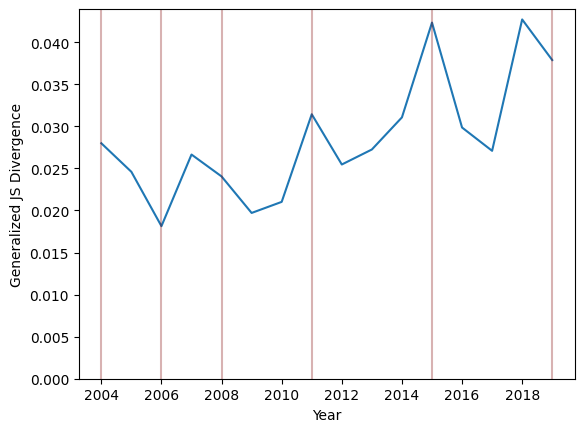

In [ ]:
plt.plot(years, pd.concat(overall_lda, ignore_index=True, axis=1).iloc[0])
plt.gca().set_ylim(bottom=0)
for year in election_years:
    plt.axvline(year, color='maroon', alpha=0.3)

plt.xlabel("Year")
plt.ylabel("Generalized JS Divergence")

#### BERTopic Results:

Text(0, 0.5, 'Generalized JS Divergence')

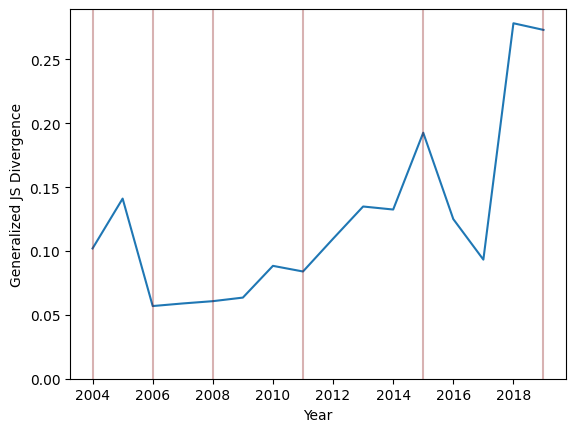

In [ ]:
plt.plot(years, pd.concat(overall_bertopic, ignore_index=True, axis=1).iloc[0])
plt.gca().set_ylim(bottom=0)
for year in election_years:
    plt.axvline(year, color='maroon', alpha=0.3)

plt.xlabel("Year")
plt.ylabel("Generalized JS Divergence")